Dataset Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
MAE  : 85833.33333333333
MSE  : 14343750000.0
RMSE : 119765.39567003484
R2   : 0.6146455223880596


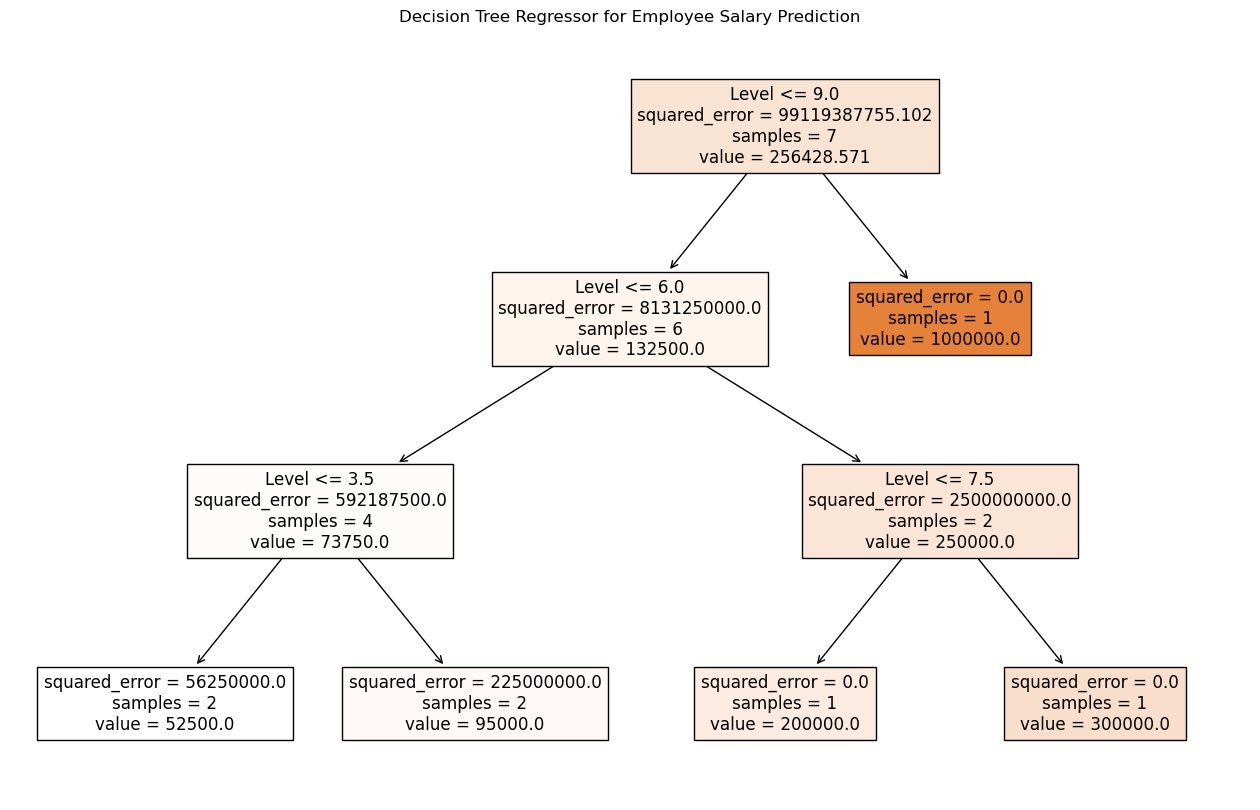


Predicted Salary for 5 years experience: 95000.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv("Salary.csv")

print("Dataset Preview:")
print(df.head())

# Step 2: Select features and target
# Change column names if your CSV has different names
X = df[["Level"]]   # Independent variable
y = df["Salary"]              # Dependent variable

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Create Decision Tree Regressor
model = DecisionTreeRegressor(
    criterion="squared_error",
    max_depth=3,
    random_state=42
)

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE  :", mean_absolute_error(y_test, y_pred))
print("MSE  :", mse)
print("RMSE :", rmse)
print("R2   :", r2_score(y_test, y_pred))

# Step 8: Plot Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(
    model,
    feature_names=["Level"],
    filled=True
)
plt.title("Decision Tree Regressor for Employee Salary Prediction")
plt.show()

# Step 9: Predict salary for new employee
new_exp = [[5]]  # 5 years experience
predicted_salary = model.predict(new_exp)
print("\nPredicted Salary for 5 years experience:", predicted_salary[0])
